In [2]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

d:\pc\PosDados\handsOn\Fraudes-Financeiras\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Download latest version
path = kagglehub.dataset_download("sgpjesus/bank-account-fraud-dataset-neurips-2022")

print("Path to dataset files:", path)

100%|██████████| 532M/532M [00:18<00:00, 30.1MB/s] 

Extracting files...


Path to dataset files: C:\Users\DOliv\.cache\kagglehub\datasets\sgpjesus\bank-account-fraud-dataset-neurips-2022\versions\2


In [12]:
df = pd.read_csv(path + "\Base.csv")
print("Dataset loaded successfully.")
print(df.head())

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\DOliv\AppData\Local\Temp\ipykernel_25400\2552186847.py:1: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv(path + "\Base.csv")


Dataset loaded successfully.
   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [19]:
df.describe(include='all')

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000,1000000.000000,1000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AB,NaN,...,NaN,NaN,NaN,INTERNET,NaN,other,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370554,NaN,...,NaN,NaN,NaN,992952,NaN,342728,NaN,NaN,NaN,NaN
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,NaN,1572.692049,...,0.222988,515.851010,0.025242,NaN,7.544940,NaN,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,NaN,1005.374565,...,0.416251,487.559902,0.156859,NaN,8.033106,NaN,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,NaN,1.000000,...,0.000000,190.000000,0.000000,NaN,-1.000000,NaN,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,NaN,894.000000,...,0.000000,200.000000,0.000000,NaN,3.103053,NaN,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,NaN,1263.000000,...,0.000000,200.000000,0.000000,NaN,5.114321,NaN,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,NaN,1944.000000,...,0.000000,500.000000,0.000000,NaN,8.866131,NaN,1.000000,1.000000,0.0,5.000000


In [28]:
df[df['fraud_bool'] == 1].head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
43,1,0.9,0.570800,-1,157,60,0.005908,35.337538,AA,4079,...,0,1500.0,0,INTERNET,4.036394,windows,1,1,0,0
140,1,0.1,0.993219,-1,67,20,0.015331,92.120139,AA,1192,...,0,1500.0,0,INTERNET,12.928072,windows,0,1,0,0
284,1,0.8,0.794351,-1,376,60,17.925951,41.422110,AA,815,...,0,1500.0,0,INTERNET,2.550167,linux,0,1,0,0
314,1,0.7,0.090000,-1,58,50,0.004134,-1.244047,AD,4011,...,0,1500.0,0,INTERNET,3.500856,windows,0,1,0,0
561,1,0.9,0.998248,31,45,30,0.010165,33.067538,AA,525,...,1,2000.0,0,INTERNET,44.536211,windows,0,1,0,0
679,1,0.9,0.763127,-1,252,30,0.010031,-1.049850,AB,2390,...,0,200.0,1,INTERNET,37.803402,linux,1,1,0,0
728,1,0.6,0.254250,-1,187,60,0.007115,-1.112033,AB,1040,...,0,1500.0,0,INTERNET,11.148815,windows,1,2,0,0
890,1,0.8,0.129198,-1,182,60,0.009373,20.003508,AA,4429,...,0,500.0,0,INTERNET,36.809555,windows,0,1,0,0
1097,1,0.9,0.128284,-1,138,30,1.502816,32.820852,AA,3288,...,1,1500.0,0,INTERNET,5.199206,linux,0,1,0,0
1139,1,0.1,0.120051,-1,62,30,0.009814,48.951723,AA,2294,...,0,200.0,0,INTERNET,31.086788,other,1,1,0,0


In [15]:
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [18]:
df['name_email_similarity'].unique()

array([0.98650631, 0.61742601, 0.99670702, ..., 0.14089138, 0.00248024,
       0.99339133], shape=(998861,))

In [20]:
print(df['fraud_bool'].value_counts())

fraud_bool
0    988971
1     11029
Name: count, dtype: int64


In [21]:
df_stud = df.copy()

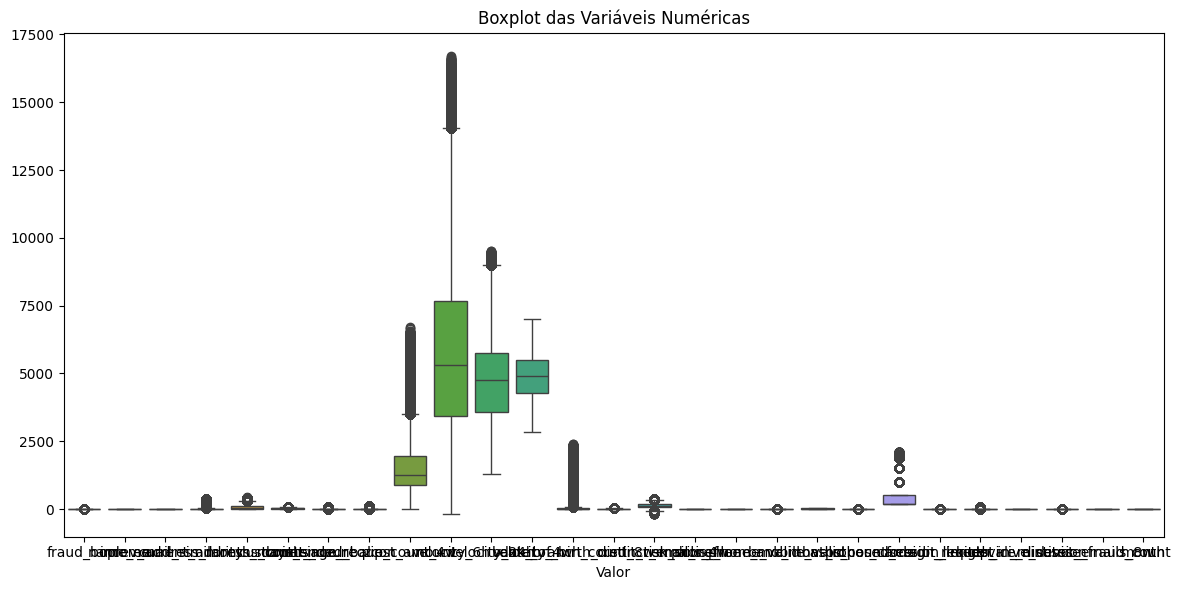

In [22]:
# Criar o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_stud, orient="v")
plt.title("Boxplot das Variáveis Numéricas")
plt.xlabel("Valor")
plt.tight_layout()

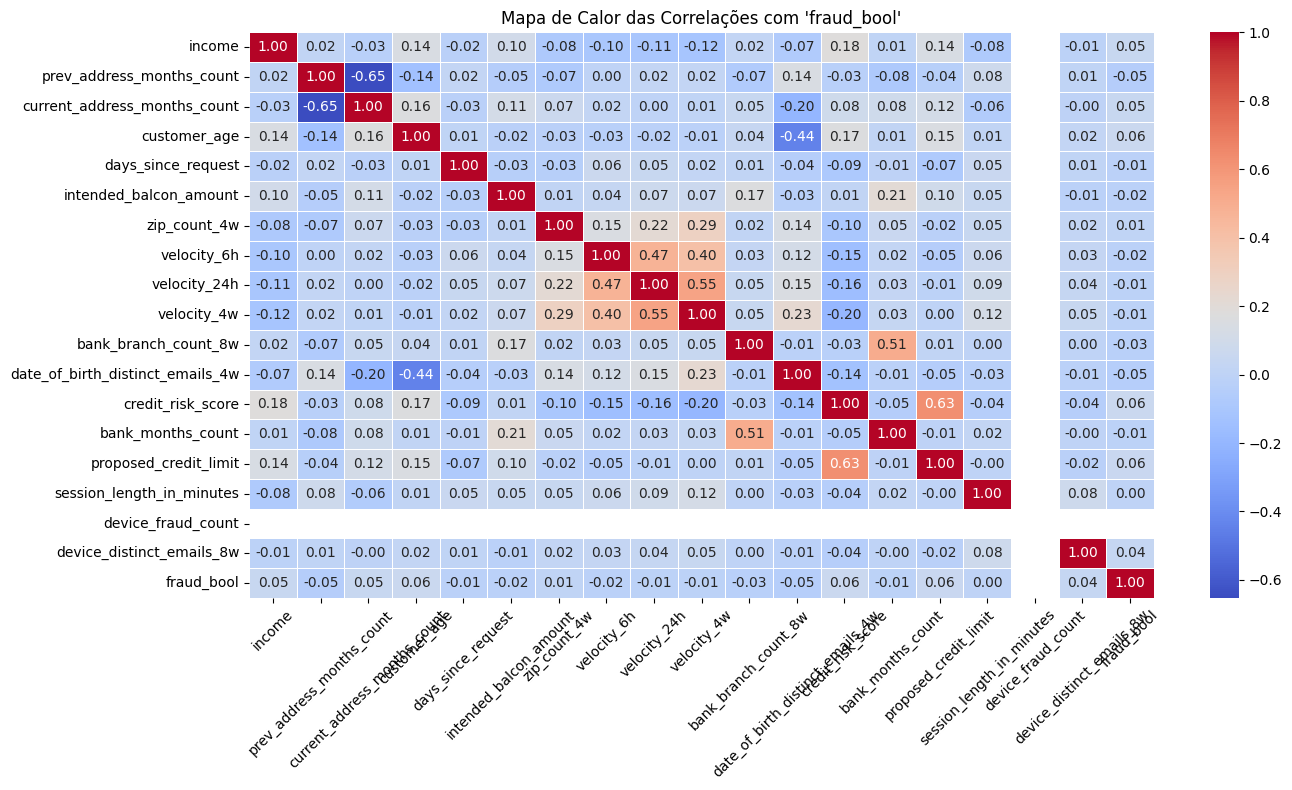

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Converter a coluna target para inteiro (caso ainda não esteja)
df['fraud_bool'] = df['fraud_bool'].astype(int)

# Lista de colunas numéricas para análise de correlação
cols = [
    'income', 'prev_address_months_count', 'current_address_months_count',
    'customer_age', 'days_since_request', 'intended_balcon_amount',
    'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
    'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
    'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',
    'session_length_in_minutes', 'device_fraud_count',
    'device_distinct_emails_8w', 'fraud_bool'
]

# Filtrar as colunas e garantir que são todas numéricas
df_numeric = df[cols].apply(pd.to_numeric, errors='coerce')

# Remover linhas com valores ausentes
df_clean = df_numeric.dropna()

# Calcular a matriz de correlação (Spearman é ideal para lidar com variáveis não normalizadas)
correlation_matrix = df_clean.corr(method='spearman')

# Plotar o heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor das Correlações com 'fraud_bool'")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [24]:
df_test = df.copy()

In [29]:
print(df_stud.dtypes)


fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

Codificando colunas categóricas: 100%|██████████| 5/5 [00:00<00:00, 17.73it/s]


Treinando modelo...


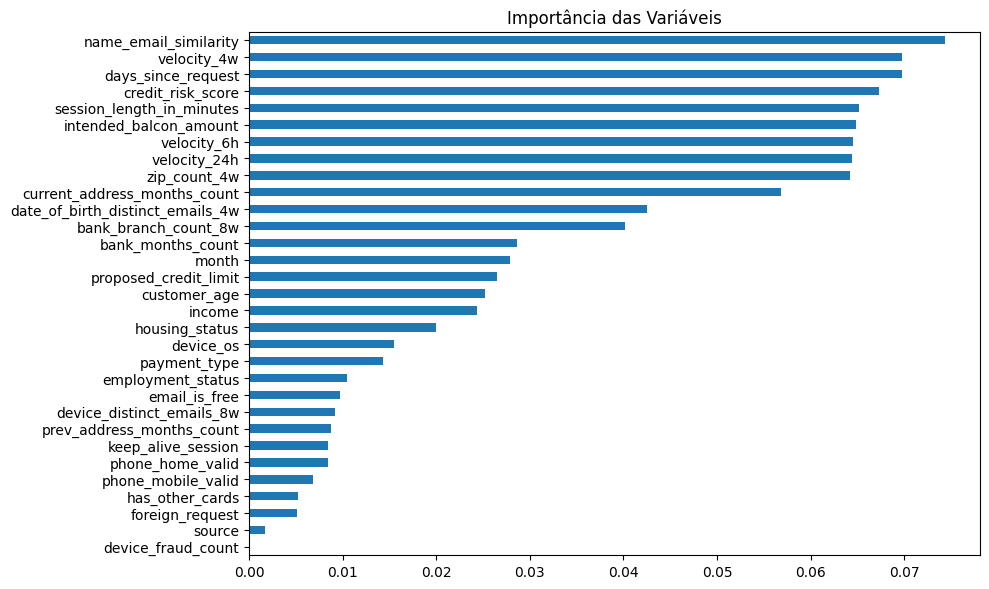

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

# Ativar barra de progresso nas transformações
tqdm.pandas()

# Cópia do dataset original
df_import = df.copy()

# Limitar dados para acelerar (opcional)
df_import = df_import.sample(n=500_000, random_state=42)

# Label Encoding nas colunas categóricas
for col in tqdm(df_import.select_dtypes(include='object').columns, desc="Codificando colunas categóricas"):
    df_import[col] = LabelEncoder().fit_transform(df_import[col].astype(str))

# Verificar se há colunas booleanas e converter para int
for col in df_import.select_dtypes(include='bool').columns:
    df_import[col] = df_import[col].astype(int)

# Separar variáveis e target
X = df_import.drop(columns=['fraud_bool'])
y = df_import['fraud_bool']

# Dividir em treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Treinar modelo RandomForest
print("Treinando modelo...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Gráfico de importância das variáveis
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot.barh(figsize=(10, 6), title="Importância das Variáveis")
plt.tight_layout()
plt.show()


tratamento apos limpesa dos dados

In [31]:
# Calcular matriz de correlação
correlation_matrix = df_clean.corr()

# Visualizar as 10 variáveis mais correlacionadas com is_fraud
correlation_matrix['fraud_bool'].sort_values(ascending=False).head(10)


fraud_bool                      1.000000
credit_risk_score               0.070624
proposed_credit_limit           0.068907
customer_age                    0.062959
income                          0.045079
device_distinct_emails_8w       0.035704
current_address_months_count    0.033701
session_length_in_minutes       0.008999
zip_count_4w                    0.005212
days_since_request              0.000567
Name: fraud_bool, dtype: float64

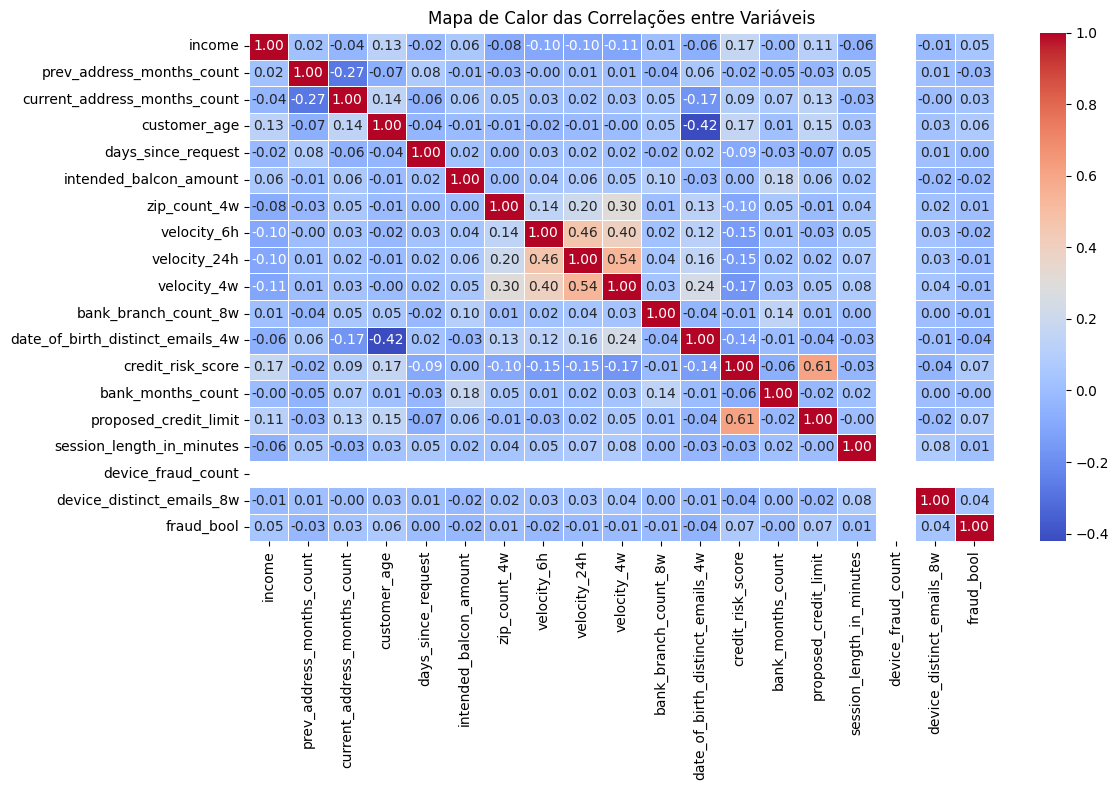

In [32]:

plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor das Correlações entre Variáveis")
plt.tight_layout()
plt.show()


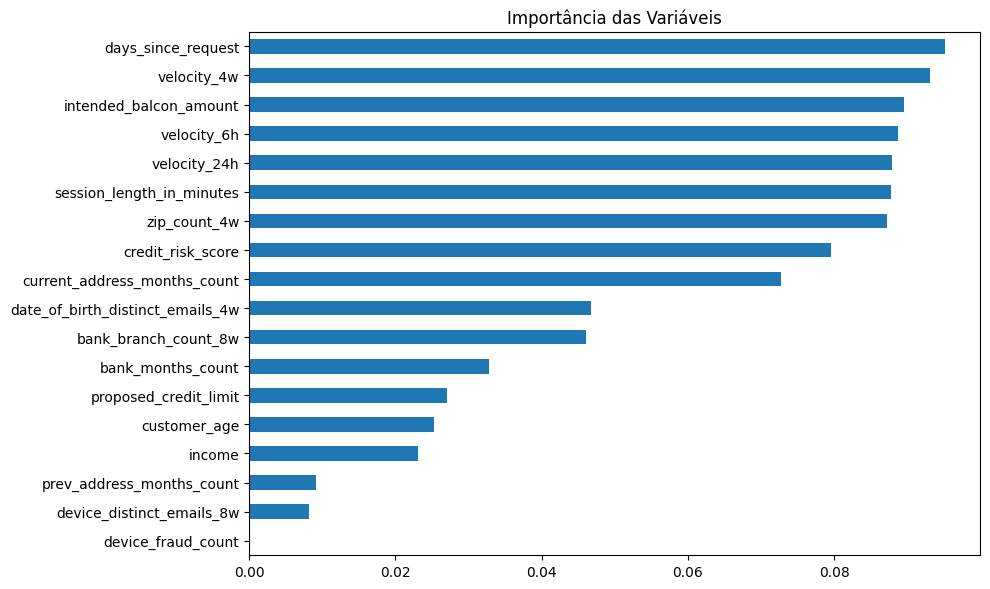

In [35]:

# Separar features e target
X = df_clean.drop(columns=['fraud_bool'])
y = df_clean['fraud_bool']

# Separar em treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Treinar modelo
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# Plotar importâncias das variáveis
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot.barh(figsize=(10, 6), title="Importância das Variáveis")
plt.tight_layout()
plt.show()


In [36]:
df_columns = df_clean.columns.tolist()
df_columns

['income',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'bank_months_count',
 'proposed_credit_limit',
 'session_length_in_minutes',
 'device_fraud_count',
 'device_distinct_emails_8w',
 'fraud_bool']